# Table of Contents
#### 01. Importing
#### 02. Addressing PII Data
#### 03. Create a regional segmentation of the data
#### 04. Exclusion flag - low activity customers
#### 05. Customer Profiling
#### 06. Visualizations
#### 07. Aggregate
#### 08. & 09. Compare your customer profiles with regions and departments and Visualizations
#### 10. Export Data

## 01. Importing

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Path
path =r'/Users/heathervisentin/Desktop/Data Analysis/Achievement 4/07-2020 Instacart Basket Analysis'

In [3]:
# Importing Data: newest data
dfnewest = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

## 02. Addressing PII Data

In [ ]:
#check data
dfnewest.head()

In [5]:
# dropping first and last name due to PII
dfnewest = dfnewest.drop(columns = ['First Name', 'Last Name'])

In [ ]:
#checking 
dfnewest.head()

In [7]:
pd.options.display.max_columns = None

In [ ]:
#double checking no other columns need to be addressed due to PII
dfnewest.head()

## 03. Create a regional segmentation of the data

### 3a - defining regions

In [9]:
#Creating regions per wikipedia
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan','Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [10]:
# creating new region column
dfnewest.loc[dfnewest['State'].isin(Northeast), 'Region'] = 'Northeast'
dfnewest.loc[dfnewest['State'].isin(South), 'Region'] = 'South'
dfnewest.loc[dfnewest['State'].isin(West), 'Region'] = 'West'
dfnewest.loc[dfnewest['State'].isin(Midwest), 'Region'] = 'Midwest'

In [11]:
# checking new region column
dfnewest['Region'].head()

0    South
1    South
2    South
3    South
4    South
Name: Region, dtype: object

double checking to make sure they add up

In [12]:
dfnewest.shape

(32404859, 32)

In [13]:
dfnewest['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

### 3b - spending habits across regions

In [ ]:
# create crosstab to compare
crosstab = pd.crosstab(dfnewest['Region'], dfnewest['spending_flag'], dropna = False)

In [ ]:
crosstab

## 04. Exclusion flag - low activity customers

In [17]:
# create new column for activity
s

In [ ]:
# check new colum
dfnewest.head()

In [19]:
# create subset for low activity customer
df_low_activity=dfnewest[dfnewest['activity'] == 'low activity customer']

In [20]:
df_high_activity=dfnewest[dfnewest['activity'] == 'high activity customer']

checking shape, making sure the add up

In [21]:
df_low_activity.shape

(1440295, 33)

In [22]:
df_high_activity.shape

(30964564, 33)

In [23]:
dfnewest.shape

(32404859, 33)

checking max order is less than 5

In [24]:
df_low_activity['max_order'].max()

4

In [25]:
#export low activitiy df
df_low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activ_cust.pkl'))

In [26]:
#export high activitiy df
df_high_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activ_cust.pkl'))

## 05. Customer Profiling

In [16]:
# Importing high activity data
df_high = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activ_cust.pkl'))

In [ ]:
df_high.head()

### Age

In [32]:
#looking at age range
df_high['Age'].max()

81

In [33]:
df_high['Age'].min()

18

In [10]:
# create new column for age groups
df_new.loc[df_new['Age'] >=60, 'age_group'] = 'Older Age'
df_new.loc[(df_new['Age'] >35) & (df_new['Age'] <60), 'age_group'] = 'Middle Age'
df_new.loc[df_new['Age'] <=35, 'age_group'] = 'Young Age'

In [35]:
# checking
df_high.shape

(30964564, 35)

In [36]:
df_high['age_group'].value_counts(dropna=False)

Middle Age    11651255
Older Age     10574504
Young Age      8738805
Name: age_group, dtype: int64

In [37]:
# checking column
df_high.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,Gender,State,Age,date_joined,dependents,fam_status,income,Region,activity,dependent_group,age_group
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,both,Regularly busy,Mid-range product,Regular Days,Average Orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Dependents,Young Age
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Mid-range product,Slowest Days,Average Orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Dependents,Young Age
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Mid-range product,Slowest Days,Most Orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Dependents,Young Age
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Least busy,Mid-range product,Slowest Days,Average Orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Dependents,Young Age
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Least busy,Mid-range product,Slowest Days,Most Orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Dependents,Young Age


### Income

In [38]:
df_high['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [39]:
df_high['income'].max()

593901

In [40]:
df_high['income'].min()

25903

In [41]:
df_high['income'].mean()

99675.86510754681

In [11]:
# create new column for income groups
df_new.loc[df_new['income'] >=99676, 'income_group'] = 'Above Average Income'
df_new.loc[df_new['income'] <=99675, 'income_group'] = 'Below Average Income'

In [43]:
df_high['income_group'].value_counts(dropna=False)

Below Average Income    16623993
Above Average Income    14340571
Name: income_group, dtype: int64

In [ ]:
df_high.head()

## Departments

In [18]:
# Importing department data
df_depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=False)

In [19]:
df_depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [20]:
# renaming column
df_depts=df_depts.rename(columns={'Unnamed: 0' : 'department_id'})

In [45]:
df_depts

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [21]:
# Merging depts with high
df_high_merge =df_high.merge(df_depts,on='department_id')

In [23]:
#export high activitiy df
df_high_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'newest.pkl'))

### Dependents

In [ ]:
df_high.head()

In [12]:
# rename column 
df_new=df_new.rename(columns={'dependants' : 'dependents'})

In [26]:
df_high['dependents'].max()

3

In [27]:
df_high['dependents'].min()

0

In [28]:
df_high['dependents'].mean()

1.501819176268718

In [13]:
# creating new column for dependents
df_new.loc[df_new['dependents'] == 0, 'dependent_group'] = 'No Dependents'
df_new.loc[df_new['dependents'] >0, 'dependent_group'] = 'Dependents'

In [ ]:
#check
df_high.head()

## 06. Visualization

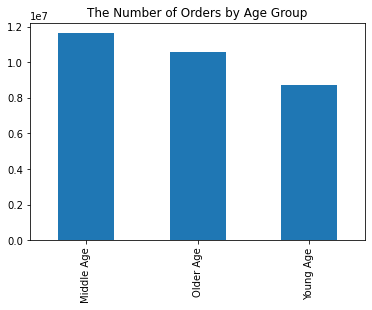

In [44]:
# bar graph for age groups
bar_agegroup = df_high['age_group'].value_counts().sort_index().plot.bar(title = 'The Number of Orders by Age Group')

In [ ]:
# export bar chart
bar_agegroup.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_groups.png'))

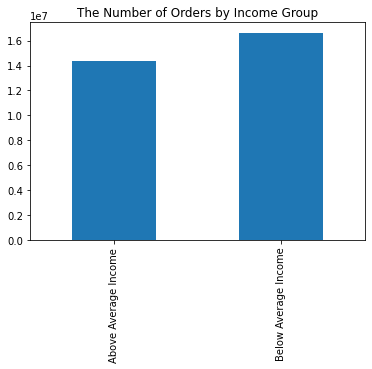

In [45]:
# bar graph for income groups
bar_incomegroup = df_high['income_group'].value_counts().sort_index().plot.bar(title = 'The Number of Orders by Income Group')

In [ ]:
# export bar chart
bar_incomegroup.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_groups.png'))

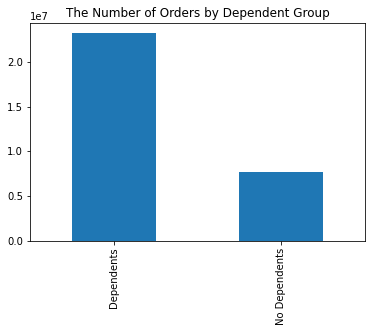

In [46]:
# bar graph for dependents groups
bar_dependent = df_high['dependent_group'].value_counts().sort_index().plot.bar(title = 'The Number of Orders by Dependent Group')

In [ ]:
# export bar chart
bar_dependent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependent_groups.png'))

In [4]:
# import newest data with departments
df_new = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'newest.pkl'))

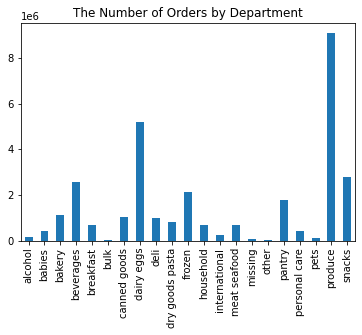

In [5]:
# bar graph for departments
bar_departments = df_new['department'].value_counts().sort_index().plot.bar(title = 'The Number of Orders by Department')

In [7]:
# export bar chart
bar_departments.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ddepartments.png'))

In [14]:
df_new.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,dependents,fam_status,income,Region,activity,department,age_group,income_group,dependent_group
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,2/17/2019,3,married,40423,South,high activity customer,beverages,Young Age,Below Average Income,Dependents
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,high activity customer,beverages,Young Age,Below Average Income,Dependents
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,high activity customer,beverages,Young Age,Below Average Income,Dependents
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,high activity customer,beverages,Young Age,Below Average Income,Dependents
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,high activity customer,beverages,Young Age,Below Average Income,Dependents


In [15]:
#export df 
df_new.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'newest2.pkl'))

## 07. Aggregate

In [16]:
# import newest data with departments
df_new = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'newest2.pkl'))

create customer level profiles

In [26]:
#customer profiles for young, old and middle aged parents
df_new.loc[(df_new['age_group'] == 'Older Age') & (df_new['dependent_group'] == 'Dependents'), 'parent_profile'] = 'Older Parent'
df_new.loc[(df_new['age_group'] == 'Middle Age') & (df_new['dependent_group'] == 'Dependents'), 'parent_profile'] = 'Middle Aged Parent'
df_new.loc[(df_new['age_group'] == 'Young Age') & (df_new['dependent_group'] == 'Dependents'), 'parent_profile'] = 'Younger Parent'

In [27]:
#customer profiles for young, old and middle aged non parents
df_new.loc[(df_new['age_group'] == 'Older Age') & (df_new['dependent_group'] == 'No Dependents'), 'parent_profile'] = 'Older Childless'
df_new.loc[(df_new['age_group'] == 'Middle Age') & (df_new['dependent_group'] == 'No Dependents'), 'parent_profile'] = 'Middle Aged Childless'
df_new.loc[(df_new['age_group'] == 'Young Age') & (df_new['dependent_group'] == 'No Dependents'), 'parent_profile'] = 'Younger Childless'

In [28]:
#checking
df_new['parent_profile'].value_counts(dropna=False)

Middle Aged Parent       8734535
Older Parent             7929233
Younger Parent           6561115
Middle Aged Childless    2916720
Older Childless          2645271
Younger Childless        2177690
Name: parent_profile, dtype: int64

In [29]:
df_new.groupby('age_group').agg({'prices':['min', 'mean', 'max']})

prices                
              min      mean   max
age_group                        
Middle Age    1.0  7.790941  25.0
Older Age     1.0  7.795446  25.0
Young Age     1.0  7.784246  25.0

In [30]:
df_new.groupby('parent_profile').agg({'prices':['min', 'mean', 'max']})

prices                
                         min      mean   max
parent_profile                              
Middle Aged Childless    1.0  7.786014  25.0
Middle Aged Parent       1.0  7.792587  25.0
Older Childless          1.0  7.801014  25.0
Older Parent             1.0  7.793589  25.0
Younger Childless        1.0  7.780360  25.0
Younger Parent           1.0  7.785536  25.0

In [31]:
df_new.groupby('fam_status').agg({'dependents':['min', 'mean', 'max']})

dependents              
                                        min      mean max
fam_status                                               
divorced/widowed                          0  0.000000   0
living with parents and siblings          1  1.986783   3
married                                   1  2.003357   3
single                                    0  0.000000   0

In [32]:
df_new.groupby('parent_profile').agg({'days_since_last_order':['min', 'mean', 'max']})

days_since_last_order                 
                                        min       mean   max
parent_profile                                              
Middle Aged Childless                   0.0  10.175382  30.0
Middle Aged Parent                      0.0  10.243772  30.0
Older Childless                         0.0  10.176669  30.0
Older Parent                            0.0  10.233132  30.0
Younger Childless                       0.0  10.309562  30.0
Younger Parent                          0.0  10.228745  30.0

## 08. & 09. Compare your customer profiles with regions and departments and Visualizations

In [34]:
# grouping 
parent_region = df_new.groupby(['Region', 'parent_profile']).size().unstack(fill_value=0)

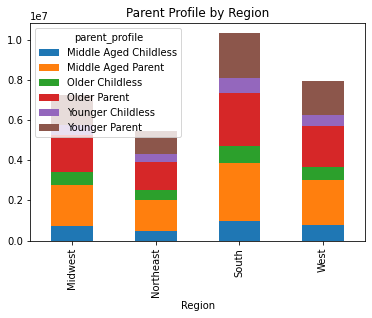

In [35]:
#create bar graph for parent profile and region
bar_parent_region = parent_region.plot.bar(stacked = True, title = 'Parent Profile by Region')

In [36]:
#Exporting graph
bar_parent_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_parent_region.png'))

In [39]:
#Grouping departments
parent_depts = df_new.groupby(['department', 'parent_profile']).size().unstack(fill_value=0)

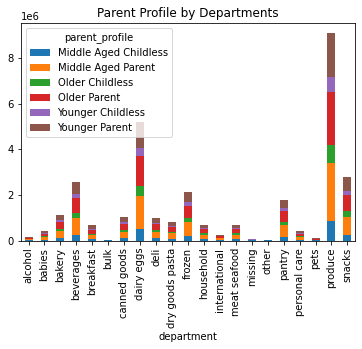

In [40]:
#stacked bar graph
stacked_parent_dept = parent_depts.plot.bar(stacked = True, title = 'Parent Profile by Departments')

In [41]:
#Exporting graph
stacked_parent_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_parent_dept.png'))

In [44]:
# grouping
region_depts = df_new.groupby(['department', 'Region']).size().unstack(fill_value=0)

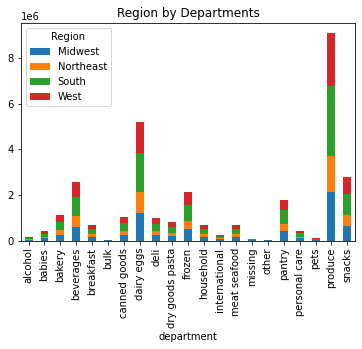

In [45]:
#stacked bar graph
stacked_region_dept = region_depts.plot.bar(stacked = True, title = 'Department by region')

In [46]:
#Exporting graph
stacked_region_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_region_dept.png'))

# 10. Export Data

In [ ]:
# export df
df_new.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'newest3.pkl'))